In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats 
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm


In [2]:
tips=sns.load_dataset('tips')

# centre tendency 

-- using libiaray 

In [3]:
# Using libirary 
# mean- avg value 
tips.total_bill.mean()

19.78594262295082

In [4]:
# mode -- frequent value 
tips.total_bill.mode()

0    13.42
Name: total_bill, dtype: float64

In [7]:
# median 
tips.total_bill.median()

17.795

-- using fomula 

In [8]:
t_bill=tips.total_bill

In [10]:
#mena
t_bill.sum()/t_bill.count()

19.78594262295082

In [90]:
def calculate_median(s):
    x=np.sort(s) 
    if len(x)%2 == 0:
        result=(x[len(x)//2-1]+x[len(x)//2])/2
        return result
    else:
       result=x[(len(x)//2)]
       return result

        
        


In [95]:
print(calculate_median(pd.Series([2, 5, 1, 9, 7, 3, 8, 4, 6,6])))

5.5


In [93]:
print(calculate_median(pd.Series([1,2,3,4,5,6,3,2,6,55,33])))

4


-- variablity 
- range 
- variance 
- standard deviation -
- cv
- quantile 
- percentile 
- box plot 
- wisker 


In [97]:
range = t_bill.max()-t_bill.min()

In [99]:
# variance - it is basiclly measure of valiablity that tells how the value is spread throught the mean .

t_bill.var()


79.25293861397827

In [101]:
# variance of population 
t_bill.var(ddof=0)

78.92813148851114

In [102]:
# std 
t_bill.std()

8.902411954856856

In [105]:
 
t_bill.std(ddof=0)

8.884150577771132

In [108]:
t_tips=tips.tip

In [111]:
# covariance 
tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

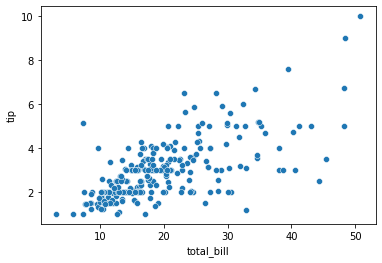

In [113]:
sns.scatterplot(x=t_bill,y=t_tips)


In [114]:
t_tips.cov(t_bill)

8.323501629224854

 the only limitation of covarise that  it is  not give the strength of relatio so then we use coreltion.

In [116]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


--- pdf and cdf 

random variable 
type of random variablr
1)random discreat variable
2) continous variable

1)discreat variable -->pmf probablity mass function -->cdf (cumsum of pmf) p(X<=x>)

2) continues rv 
pdf-how to measure pdf 1)perametric and 2) non paremateic 
cdf 


In [120]:
# non parametric approch 

normal=np.random.normal(10,100,1000)


In [124]:
mu,std =stats.norm.fit(normal)

In [132]:
pdf_using_libiarary=stats.norm.pdf(np.linspace(normal.min(),normal.max(),1000),mu,std)

In [129]:
import math

In [130]:
x=np.linspace(normal.min(),normal.max(),1000)

In [131]:
pdf = [1/(std*math.sqrt(2*math.pi)) * math.exp(-(i-mu)**2/(2*std**2)) for i in x]

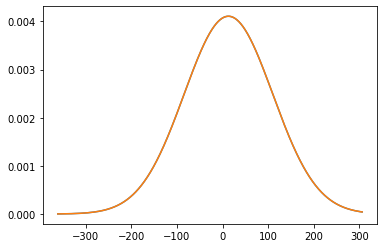

In [138]:
plt.plot(x,pdf_using_libiarary)
plt.plot(x,pdf)

In [151]:
cdf=stats.norm.cdf(x,mu,std)

In [145]:
cdf/max(cdf)

array([5.86612557e-05, 6.03311009e-05, 6.20456907e-05, 6.38061407e-05,
       6.56135922e-05, 6.74692122e-05, 6.93741944e-05, 7.13297592e-05,
       7.33371550e-05, 7.53976580e-05, 7.75125732e-05, 7.96832348e-05,
       8.19110068e-05, 8.41972836e-05, 8.65434909e-05, 8.89510855e-05,
       9.14215569e-05, 9.39564273e-05, 9.65572524e-05, 9.92256220e-05,
       1.01963161e-04, 1.04771529e-04, 1.07652423e-04, 1.10607576e-04,
       1.13638759e-04, 1.16747781e-04, 1.19936489e-04, 1.23206772e-04,
       1.26560558e-04, 1.29999816e-04, 1.33526557e-04, 1.37142837e-04,
       1.40850753e-04, 1.44652447e-04, 1.48550107e-04, 1.52545966e-04,
       1.56642304e-04, 1.60841449e-04, 1.65145779e-04, 1.69557719e-04,
       1.74079745e-04, 1.78714386e-04, 1.83464221e-04, 1.88331882e-04,
       1.93320058e-04, 1.98431490e-04, 2.03668975e-04, 2.09035369e-04,
       2.14533585e-04, 2.20166594e-04, 2.25937427e-04, 2.31849178e-04,
       2.37905001e-04, 2.44108113e-04, 2.50461797e-04, 2.56969400e-04,
      

In [149]:
cdf1=np.cumsum(pdf)

In [157]:
cdf2=cdf = [0.5 * (1 + math.erf((i - mu) / (std * math.sqrt(2)))) for i in x]


C:\Users\Deepak\AppData\Local\Temp\ipykernel_4828\4032717068.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


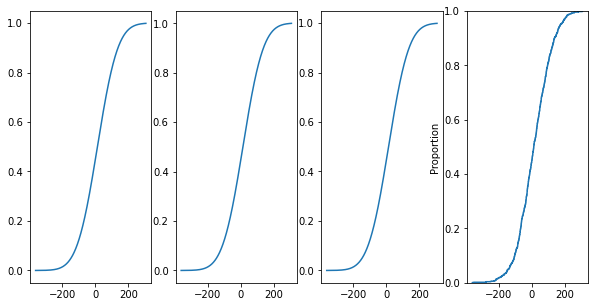

In [174]:
fig,ax=plt.subplots(ncols=4,figsize=(10,5))
ax[0].plot(x,cdf)
ax[1].plot(x,cdf1/max(cdf1))
ax[2].plot(x,cdf)
sns.ecdfplot(normal)
fig.show()


-- non parematric approch 

In [183]:
pareto = np.random.pareto(a=1,size=1000)

In [196]:
kde=KernelDensity(bandwidth=0.5,kernel='gaussian')

In [197]:
kde.fit(pareto.reshape(-1,1))

KernelDensity(bandwidth=0.5)

In [221]:
x=np.linspace(pareto.min(),pareto.max(),100)

In [200]:
pdf=np.exp(kde.score_samples(x.reshape(-1,1)))

<AxesSubplot: ylabel='Density'>

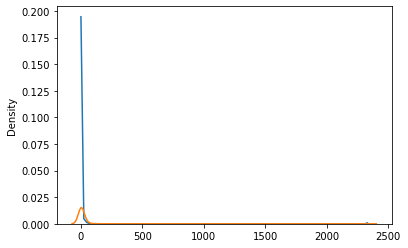

In [211]:
plt.plot(x,pdf)
sns.kdeplot(pareto)

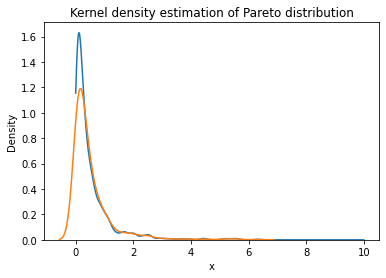

In [212]:
alpha = 3.0
x = np.random.pareto(alpha, size=1000)

# Fit a Gaussian kernel density estimator to the data
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(x.reshape(-1, 1))

# Evaluate the density estimator at some points
x_grid = np.linspace(0, 10, 1000)
log_density = kde.score_samples(x_grid.reshape(-1, 1))

# Plot the density estimator
plt.plot(x_grid, np.exp(log_density))
sns.kdeplot(x)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Kernel density estimation of Pareto distribution')
plt.show()

In [220]:
cdf=pdf.cumsum()

<AxesSubplot: ylabel='Proportion'>

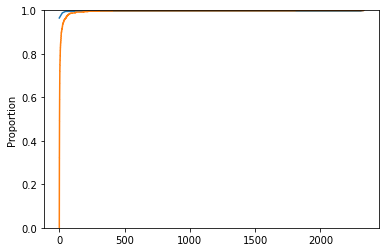

In [223]:
plt.plot(x,cdf/max(cdf))
sns.ecdfplot(pareto)

tips

<AxesSubplot: ylabel='Density'>

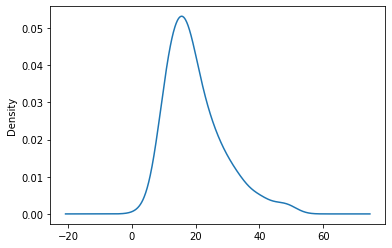

In [226]:
tips.total_bill.plot(kind='kde')

In [244]:
kde=KernelDensity(kernel='gaussian',bandwidth=1.5)

In [249]:
kde.fit(t_bill.values.reshape(-1,1))

KernelDensity(bandwidth=1.5)

In [250]:
x=np.linspace(t_bill.min(),t_bill.max(),len(t_bill))

In [251]:
pdf=np.exp(kde.score_samples(x.reshape(-1,1)))

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

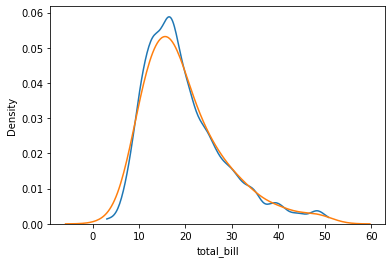

In [254]:
plt.plot(x,pdf)
sns.kdeplot(t_bill)

In [257]:
cdf=pdf.cumsum()

<AxesSubplot: xlabel='total_bill', ylabel='Proportion'>

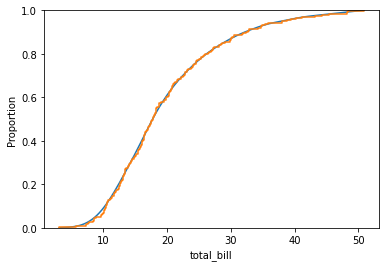

In [258]:
plt.plot(x,cdf/max(cdf))
sns.ecdfplot(t_bill)

--continues random distribution 
- normal distribution 
  - parmameter(mu,sigma(std))
  - standarnd normal distribution where the mean=0 and std=1
  - z calculation 
- pareto distribution 
  -paremeter(alpha(shape parameter),scale=xm(min))
  - it used for the welth 
- log - normal distribution 
  - the log of log normal distribution is normal distribution 
  - parameter(mu,sigma)
- uniform distribution 
  - the continues random distrbution where all the outcome are equally distribution
  - parameter(lower_bound,upper_bound)